<a href="https://colab.research.google.com/github/vinhbui123/machine_learning/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

1.1

In [4]:
# Load the dataset (For Google Colab)

from google.colab import files
uploaded = files.upload()

import os
import pandas as pd

# Verify file upload
print("Files in current directory:", os.listdir())

# Define dataset filename
file_name = "dataset1.csv"

# Handle encoding issues
encodings = ["utf-8", "latin1", "ISO-8859-1", "utf-16", "utf-8-sig"]
for enc in encodings:
    try:
        df = pd.read_csv(file_name, encoding=enc)
        print(f"Successfully loaded with encoding: {enc}")
        break
    except Exception:
        continue

# Display general information about the dataset
print("\nGeneral Dataset Information:")
df.info()

# Display a quick statistical summary of the columns
print("\nStatistical Summary:")
print(df.describe())


Saving dataset1.csv to dataset1.csv
Files in current directory: ['.config', 'dataset1.csv', 'sample_data']
Successfully loaded with encoding: latin1

General Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73859 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Eff

1.2

In [5]:
# Calculate missing values for each column
missing_values = df.isnull().sum()

# Calculate the missing rate (percentage) for each column
missing_rate = (missing_values / len(df)) * 100

# Calculate the overall missing rate for the dataset
overall_missing_rate = (missing_values.sum() / (df.shape[0] * df.shape[1])) * 100

missing_rate, overall_missing_rate

(BeerID            0.000000
 Name              0.002708
 URL               0.000000
 Style             0.806921
 StyleID           0.000000
 Size(L)           0.000000
 OG                0.000000
 FG                0.000000
 ABV               0.000000
 IBU               0.000000
 Color             0.000000
 BoilSize          0.000000
 BoilTime          0.000000
 BoilGravity       4.048144
 Efficiency        0.000000
 MashThickness    40.432705
 SugarScale        0.000000
 BrewMethod        0.000000
 PitchRate        53.143066
 PrimaryTemp      30.681957
 PrimingMethod    90.847673
 PrimingAmount    93.536508
 UserId           68.358132
 dtype: float64,
 16.602513652259855)

1.3

In [11]:
# Drop columns where the missing rate is greater than 50%
threshold = 50  # Percentage threshold for dropping columns
columns_to_drop = missing_rate[missing_rate > threshold].index

# Drop the identified columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the remaining columns after dropping
df_cleaned.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod',
       'PrimaryTemp'],
      dtype='object')

1.4

In [12]:
from sklearn.impute import SimpleImputer

# Identify columns with missing values but missing rate <= 50%
low_missing_cols = missing_rate[(missing_rate > 0) & (missing_rate <= 50)].index

# Separate numerical and categorical columns
num_cols = df_cleaned[low_missing_cols].select_dtypes(include=['number']).columns
cat_cols = df_cleaned[low_missing_cols].select_dtypes(include=['object']).columns

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df_cleaned[num_cols] = num_imputer.fit_transform(df_cleaned[num_cols])

# Impute categorical columns with the most frequent value (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[cat_cols] = cat_imputer.fit_transform(df_cleaned[cat_cols])

# Display a sample of the cleaned dataset after imputation
df_cleaned.head()


,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PrimaryTemp
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,1.5,Specific Gravity,All Grain,17.78
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,1.5,Specific Gravity,All Grain,20.00
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,1.5,Specific Gravity,extract,20.00
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1.5,Specific Gravity,All Grain,20.00
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,1.5,Specific Gravity,All Grain,19.00


1.5

In [ ]:
from sklearn.impute import KNNImputer

# KNN Imputer works only with numerical data, so we select numerical columns
num_cols = df_cleaned.select_dtypes(include=['number']).columns

# Initialize KNNImputer (default n_neighbors=5)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputer to numerical columns
df_cleaned[num_cols] = knn_imputer.fit_transform(df_cleaned[num_cols])

# Display a sample of the dataset after KNN imputation
df_cleaned.head()


,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PrimaryTemp
0,1.0,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45.0,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75.0,1.038,70.0,1.5,Specific Gravity,All Grain,17.78
1,2.0,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85.0,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60.0,1.070,70.0,1.5,Specific Gravity,All Grain,20.00
2,3.0,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7.0,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60.0,1.047,70.0,1.5,Specific Gravity,extract,20.00
3,4.0,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7.0,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60.0,1.047,70.0,1.5,Specific Gravity,All Grain,20.00
4,5.0,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20.0,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90.0,1.050,72.0,1.5,Specific Gravity,All Grain,19.00


1.6

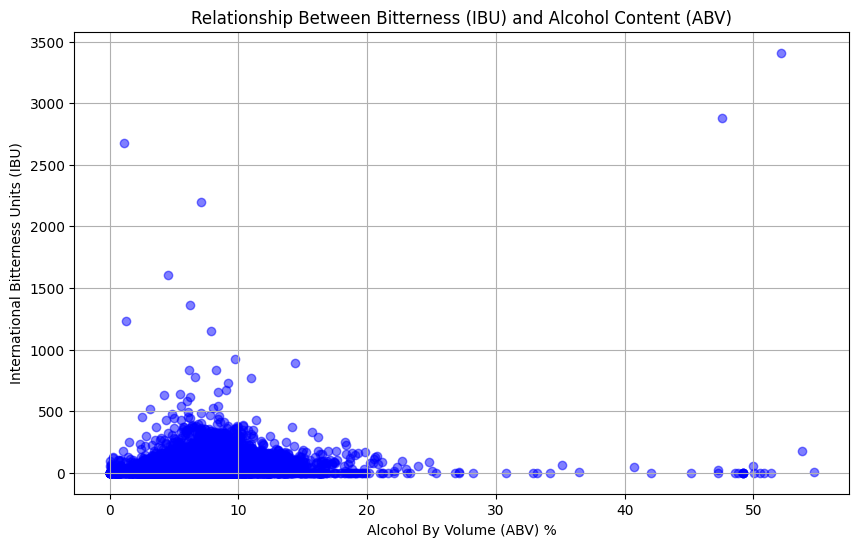

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of ABV vs IBU
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['ABV'], df_cleaned['IBU'], alpha=0.5, color='blue')

# Labels and title
plt.xlabel('Alcohol By Volume (ABV) %')
plt.ylabel('International Bitterness Units (IBU)')
plt.title('Relationship Between Bitterness (IBU) and Alcohol Content (ABV)')
plt.grid(True)

# Show plot
plt.show()


1.7

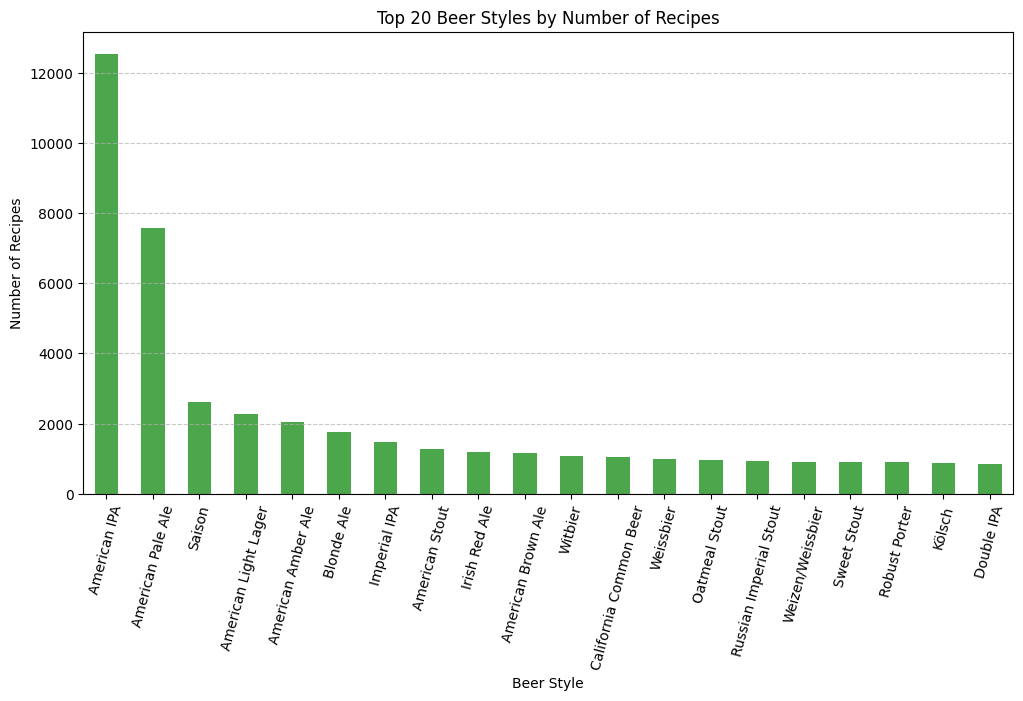

In [14]:
# Count the number of recipes for each beer style
style_counts = df_cleaned['Style'].value_counts().head(20)
# Displaying top 20 styles for clarity

# Bar chart for beer style distribution
plt.figure(figsize=(12, 6))
style_counts.plot(kind='bar', color='green', alpha=0.7)

# Labels and title
plt.xlabel('Beer Style')
plt.ylabel('Number of Recipes')
plt.title('Top 20 Beer Styles by Number of Recipes')
plt.xticks(rotation=75)  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


1.8

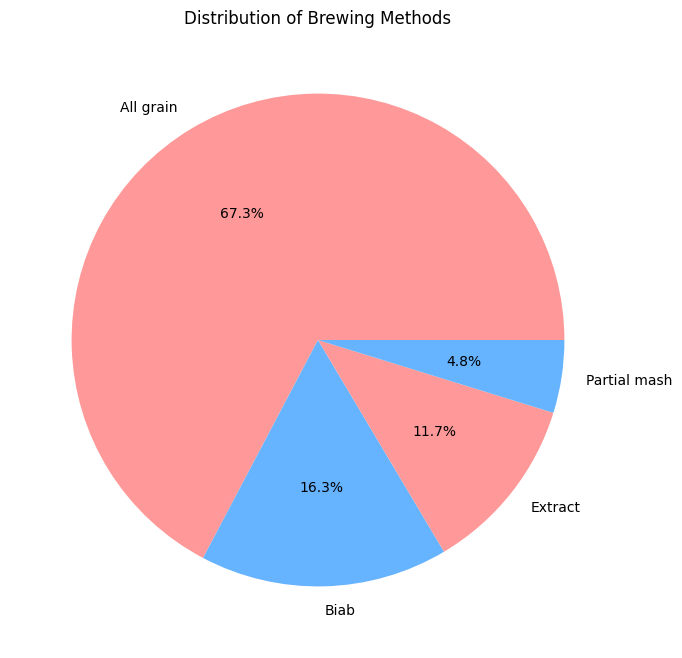

In [15]:
# Normalize brewing method names
df["BrewMethod"] = df["BrewMethod"].str.strip().str.capitalize()

# Count occurrences of each brewing method
brew_counts = df["BrewMethod"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(brew_counts, labels=brew_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff"])
plt.title("Distribution of Brewing Methods")
plt.show()

1.9

In [16]:
# Convert BrewMethod to numeric values using one-hot encoding (dummy variables)
df_dummies = pd.get_dummies(df, columns=["BrewMethod"], dtype=int)

# Display the first few rows to verify the transformation
df_dummies.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,SugarScale,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,BrewMethod_All grain,BrewMethod_Biab,BrewMethod_Extract,BrewMethod_Partial mash
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,Specific Gravity,NaN,17.78,corn sugar,4.5 oz,116.0,1,0,0,0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,Specific Gravity,NaN,NaN,NaN,NaN,955.0,1,0,0,0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,Specific Gravity,NaN,NaN,NaN,NaN,NaN,0,0,1,0
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,Specific Gravity,NaN,NaN,NaN,NaN,NaN,1,0,0,0
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,Specific Gravity,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0,1,0,0,0
